In [1]:
!pip install tensorflow keras
!pip install mnist

In [2]:
import numpy as np
import scipy
import tensorflow as tf 
import matplotlib.pyplot as plt
from keras.datasets import mnist

# load the MNIST dataset
objects =  tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:

x_train = x_train / 255.0
x_test = x_test / 255.0

y_val = y_train[-10000:]
x_val = x_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4750 - accuracy: 0.8619
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1367 - accuracy: 0.9594
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.9735
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9852


In [7]:
print(model.evaluate(x_test,y_test))


313/313 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9766
[0.07468801736831665, 0.9765999913215637]


7
2
1
0
4
1
4
9
6


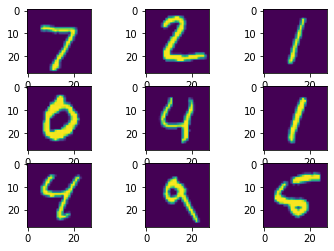

In [8]:
for i in range(9):
  prediction=model.predict(x_test)
  print(np.argmax(prediction[i]))
  plt.subplot(330 + 1 + i)
  plt.imshow(x_test[i])

9


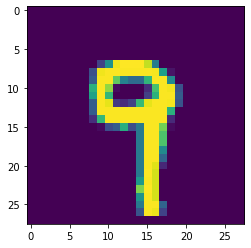

In [9]:
print(np.argmax(prediction[5602]))
plt.imshow(x_test[5602])

In [10]:
import numpy as np
from sklearn import metrics

#function [CM, acc, arrR, arrP]=func_confusion_matrix(teY, hatY)

def func_confusion_matrix(y_test, y_pred):
    """ this function is used to calculate the confusion matrix and a set of metrics.
    INPUT:
        y_test, ground-truth lables;
        y_pred, predicted labels;
    OUTPUT:
        CM, confuction matrix
        acc, accuracy
        arrR[], per-class recall rate,
        arrP[], per-class prediction rate.
    """

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    unique_values = set(y_pred)
    sorted(unique_values)
    num_classes = len(unique_values)
    unique_values = np.array(list(unique_values)) # change to array so can use indexes
    possible_string_dict = {}
    # make sure all values are 0 based, so can use built-in "zip" function
    if(issubclass(type(y_test[0]), np.integer)): # if values are integers
        y_test_min = y_test.min()
        if(y_test_min != 0):# if does not contain 0, reduce both test and pred by min value to get 0 based for both
            y_test = y_test - y_test_min;
            y_pred = y_pred - y_test_min;
    else:
        # assume values are strings, change to integers
        # TODO, change to convert list from string to int
        y_test_int = np.empty(len(y_test), dtype=int)
        y_pred_int = np.empty(len(y_pred), dtype=int)
        for index in range(0, num_classes):
            current_value = unique_values[index]
            possible_string_dict[index] = current_value
            y_test_int[y_test == current_value] = index
            y_pred_int[y_pred == current_value] = index
        y_test = y_test_int
        y_pred = y_pred_int
       
    ## your code for creating confusion matrix;
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    for a, p in zip(y_test, y_pred):
        conf_matrix[a][p] += 1
 

    ## your code for calcuating acc;
    accuracy = conf_matrix.diagonal().sum() / conf_matrix.sum()
   
    ## your code for calcualting arrR and arrP;
    recall_array = np.empty(num_classes, dtype=float)
    precision_array = np.empty(num_classes, dtype=float)
    for index in range(0, num_classes):
        value = conf_matrix[index,index]
        recall_sum = conf_matrix[index,:].sum()
        precision_sum = conf_matrix[:, index].sum()
        recall_array[index] = value / recall_sum
        precision_array[index] = value / precision_sum
       
    return conf_matrix, accuracy, recall_array, precision_array


def get_confusion_matrix_and_test(y_test, y_pred):
    """ get confusion matrix, accuracy, array of recall and precision
        test confusion matrix and accuracy
    """
    cm, acc, arrR, arrP = func_confusion_matrix(y_test, y_pred)
    expected_matrix = metrics.confusion_matrix(y_test, y_pred)
    assert(np.array_equal(expected_matrix, cm))
    expected_acc = metrics.accuracy_score(y_test, y_pred)
    assert(round(expected_acc, 2) == round(acc, 2))
    return cm, acc, arrR, arrP

def _test_confusion_matrix():
    y_test = [1, 1, 1, 1, 1,
              2, 2, 2, 2, 2, 2, 2, 2,
              3, 3, 3, 3, 3, 3, 3]
    y_pred = [2, 1, 2, 2, 3,
              2, 2, 1, 1, 3, 3, 2, 1,
              1, 1, 3, 3, 2, 2, 3]
    cm, acc, arrR, arrP = get_confusion_matrix_and_test(y_test, y_pred)

def _perform1point1(confidence_threshold):
    y_test = ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N']
    y_pred_conf = [0.95, 0.83, 0.78, 0.53, 0.9, 0.2, 0.6, 0.8, 0.7, 0.5, 0.9, 0.2]
    num_elements = len(y_pred_conf)
    y_pred = np.empty(num_elements, dtype=object)
    for index in range(0, num_elements):
        if y_pred_conf[index] > confidence_threshold:
            y_pred[index] = 'Y'
        else:
            y_pred[index] = 'N'

    cm, acc, arrR, arrP = get_confusion_matrix_and_test(y_test, y_pred)